# **Exercício**



O objetivo deste exercício é praticar atividades de obtenção, manipulação e análise de dados que seriam desempenhadas por um gestor de portfólio.

O foco é a biblioteca Pandas, mas você pode utilizar outra bibliotecas sempre que julgar necessário.

No exercício, você precisa desempenhar as seguintes tarefas:

1. Carregar no Python com a biblioteca pandas os arquivos .csv e .txt que foram passados. O arquivo .csv contém cotações de papéis brasileiros, e o arquivo .txt contém cotações de ações americanas.
2.  Utilizando a biblioteca yfinance, ou alguma outra fonte de sua escolha, obtenha os dados da cotação do dólar (apenas o Close) desde o dia inicial do dataframe das ações americanas (.txt)
3. Converta a cotação das ações americanas de dólar para real, utilizando os dados de cotação do dólar que você obteve anteriormente e crie um novo dataframe com o resultado desta operação.
4. Utilizando a função merge da Pandas, realize uma união entre os dataframes de ações brasileiras e o outro de ações americanas com as cotações convertidas para real.
5. Agora você vai simular o desempenho de uma carteira teórica. Para isto, considere a data de início dos aportes como sendo 05-03-2018. Considere que houve apenas um aporte. A carteira que você deve simular é a seguinte: 100 ações de PETR4, 100 ações de VALE3, 100 ações de LREN3, 200 ações de WEGE3, 10 ações de AAPL, 15 ações de META, 30 ações de Coca-Cola(KO) e 20 ações de Morgan Stanley (MS). Qual seria o saldo aproximado desta carteira, em R$ no dia 06/04/23?
6. Utilizando a yfinance, obtenha dados do IBOV e S&P 500. Junte isso aos dados do dólar anteriormente. Para o IBOV, utilize o ticker '^BVSP' e para o S&P500 utilize '^GSPC'. Modifique o nome dessas colunas para que no dataframe fiquem como 'IBOV' e 'S&P500'.
7. Crie um plot que compara o desempenho da carteira acima com o IBOV, S&P 500 e o dólar.
8. Qual era o saldo da carteira no dia 02/03/2020?



**Dicas importantes**

a. Na hora de carregar os arquivos .csv e .txt, fique atento à suas características, como separador, marcador decimal, formato do índice, dentre outros

b. Possivelmente, os dados da cotação do dólar vão ter um número de linhas superior ao dataframe de ações americanas, mesmo que sejam referentes à mesma data de início e de fim. Você pode utilizar o método para equalizar os índices e garantir que tenham o mesmo número de linhas

c. Para realizar a multiplicação entre o dataframe de ações americanas e cotação do dólar, você pode usar o método "mul", com uma estrutura parecida com esta:

*americanas.mul(dolar, axis=0)*

#1.Bibliotecas

In [145]:
!pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [146]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [147]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
#Importação das bibliotecas

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#2 Carregando os dados

In [150]:
df_EUA = pd.read_table('acoes_americanas.txt', sep=';')
df_BR_cru = pd.read_csv('acoes_brasileiras.csv', sep=';')

In [151]:
type(df_EUA)
df_EUA.dtypes

Date     object
AAPL    float64
KO      float64
META    float64
MS      float64
MSFT    float64
dtype: object

In [152]:
df_BR_cru.dtypes

Date        object
LREN3.SA    object
PETR4.SA    object
VALE3.SA    object
WEGE3.SA    object
dtype: object

In [153]:
df_BR = df_BR_cru.apply(lambda x: x.str.replace(',', '.'))
df_BR.head()

,Date,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
0,2005-01-03,5167.2265625,3.7520217895507812,8.902522087097168,0.8251844644546509
1,2005-01-04,5167.2265625,3.707412004470825,8.539765357971191,0.8251844644546509
2,2005-01-05,5167.2265625,3.693071126937866,8.48029613494873,0.8251844644546509
3,2005-01-06,5167.2265625,3.7042248249053955,8.444612503051758,0.8251844644546509
4,2005-01-07,5167.2265625,3.720555305480957,8.6705961227417,0.8251844644546509


In [154]:
df_BR.dtypes

Date        object
LREN3.SA    object
PETR4.SA    object
VALE3.SA    object
WEGE3.SA    object
dtype: object

##Trantando o index

###Brasil

In [155]:
#Uma vez verificado que o date é obj, precisa passar para formato de data de ambos os dados. 
#passar para dataframe e depois modificar
df_BR = pd.DataFrame(df_BR)
df_BR

,Date,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
0,2005-01-03,5167.2265625,3.7520217895507812,8.902522087097168,0.8251844644546509
1,2005-01-04,5167.2265625,3.707412004470825,8.539765357971191,0.8251844644546509
2,2005-01-05,5167.2265625,3.693071126937866,8.48029613494873,0.8251844644546509
3,2005-01-06,5167.2265625,3.7042248249053955,8.444612503051758,0.8251844644546509
4,2005-01-07,5167.2265625,3.720555305480957,8.6705961227417,0.8251844644546509
...,...,...,...,...,...
4536,2023-03-31,16.56999969482422,23.450000762939453,80.29000091552734,40.54999923706055
4537,2023-04-03,15.40999984741211,24.489999771118164,80.30999755859375,39.59000015258789
4538,2023-04-04,15.390000343322754,24.270000457763672,78.04000091552734,39.630001068115234
4539,2023-04-05,14.970000267028809,24.350000381469727,76.88999938964844,38.75


In [156]:
df_BR['Date'] = pd.to_datetime(df_BR['Date'])
df_BR.dtypes

Date        datetime64[ns]
LREN3.SA            object
PETR4.SA            object
VALE3.SA            object
WEGE3.SA            object
dtype: object

In [157]:
df_BR.set_index('Date', drop=True, inplace=True)

In [158]:
df_BR

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2005-01-03,5167.2265625,3.7520217895507812,8.902522087097168,0.8251844644546509
2005-01-04,5167.2265625,3.707412004470825,8.539765357971191,0.8251844644546509
2005-01-05,5167.2265625,3.693071126937866,8.48029613494873,0.8251844644546509
2005-01-06,5167.2265625,3.7042248249053955,8.444612503051758,0.8251844644546509
2005-01-07,5167.2265625,3.720555305480957,8.6705961227417,0.8251844644546509
...,...,...,...,...
2023-03-31,16.56999969482422,23.450000762939453,80.29000091552734,40.54999923706055
2023-04-03,15.40999984741211,24.489999771118164,80.30999755859375,39.59000015258789
2023-04-04,15.390000343322754,24.270000457763672,78.04000091552734,39.630001068115234


In [159]:
#precisa converter em numero!
df_BR[['LREN3.SA', 'PETR4.SA', 'VALE3.SA', 'WEGE3.SA']] = df_BR[['LREN3.SA', 'PETR4.SA', 'VALE3.SA', 'WEGE3.SA']].apply(pd.to_numeric)
df_BR.head()

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2005-01-03,5167.226562,3.752022,8.902522,0.825184
2005-01-04,5167.226562,3.707412,8.539765,0.825184
2005-01-05,5167.226562,3.693071,8.480296,0.825184
2005-01-06,5167.226562,3.704225,8.444613,0.825184
2005-01-07,5167.226562,3.720555,8.670596,0.825184


###EUA

In [160]:
df_EUA = pd.DataFrame(df_EUA)
df_EUA

,Date,AAPL,KO,META,MS,MSFT
0,2008-01-02,5.922567,19.046688,NaN,37.577785,25.791210
1,2008-01-03,5.925303,19.246229,NaN,37.570412,25.901058
2,2008-01-04,5.472996,19.283632,NaN,36.360840,25.176090
3,2008-01-07,5.399737,19.738840,NaN,35.630688,25.344519
4,2008-01-08,5.205502,19.819902,NaN,34.221977,24.495070
...,...,...,...,...,...,...
3838,2023-03-31,164.899994,62.029999,211.940002,87.800003,288.299988
3839,2023-04-03,166.169998,62.400002,213.070007,87.160004,287.230011
3840,2023-04-04,165.630005,62.209999,214.720001,84.820000,287.179993
3841,2023-04-05,163.759995,62.799999,211.479996,83.820000,284.339996


In [161]:
df_EUA['Date'] = pd.to_datetime(df_EUA['Date'])
df_EUA.dtypes

Date    datetime64[ns]
AAPL           float64
KO             float64
META           float64
MS             float64
MSFT           float64
dtype: object

In [162]:
df_EUA.set_index('Date', drop=True, inplace=True)

In [163]:
df_EUA.head()

,AAPL,KO,META,MS,MSFT
Date,,,,,
2008-01-02,5.922567,19.046688,NaN,37.577785,25.791210
2008-01-03,5.925303,19.246229,NaN,37.570412,25.901058
2008-01-04,5.472996,19.283632,NaN,36.360840,25.176090
2008-01-07,5.399737,19.738840,NaN,35.630688,25.344519
2008-01-08,5.205502,19.819902,NaN,34.221977,24.495070


In [164]:
#extração das datas de ref: inicial e final

data_inicial = df_EUA.index[0]
data_final = df_EUA.index[-1]
data_final

Timestamp('2023-04-06 00:00:00')

##2.1 Carregando Moeda para a conversão

In [165]:
#Download da moeda para câmbio e conversão

dolar = yf.download('BRL=X', start=data_inicial, end=data_final)['Close']
dolar.head()

[*********************100%***********************]  1 of 1 completed


Date
2008-01-02    1.7645
2008-01-03    1.7480
2008-01-04    1.7572
2008-01-07    1.7640
2008-01-08    1.7520
Name: Close, dtype: float64

In [166]:
dolar = pd.DataFrame(dolar)

dolar.dtypes

Close    float64
dtype: object

In [167]:
dolar = dolar.reset_index()
dolar

,Date,Close
0,2008-01-02,1.7645
1,2008-01-03,1.7480
2,2008-01-04,1.7572
3,2008-01-07,1.7640
4,2008-01-08,1.7520
...,...,...
3946,2023-03-30,5.1342
3947,2023-03-31,5.0927
3948,2023-04-03,5.0623
3949,2023-04-04,5.0631


In [168]:
dolar['Date'] = pd.to_datetime(dolar['Date'])
dolar.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [169]:
dolar.set_index('Date', drop=True, inplace=True)

In [170]:
#Verificando a tabela contando o dolar
dolar.head()

,Close
Date,
2008-01-02,1.7645
2008-01-03,1.7480
2008-01-04,1.7572
2008-01-07,1.7640
2008-01-08,1.7520


In [171]:
print('Precisa comparar as quantidades e verificar se tem mesmo tamanho:', len(dolar),len(df_EUA))
if len(dolar)!=len(df_EUA):
  print('Como são diferentes, precisa investigar')

Precisa comparar as quantidades e verificar se tem mesmo tamanho: 3951 3843
Como são diferentes, precisa investigar


##3 Explorando os dados

### 3.1 Verificar os dados de EUA e a moeda

In [172]:
#Primeiramente verificar quantidade de nan
print(dolar.isna().sum().sum(), df_EUA.isna().sum().sum())

0 1104


In [173]:
# Meta era facebook ou FB. Como o yahoo finance não retornou dados de FB
# para não ficar 
df_EUA_0 = df_EUA.fillna(0)
df_EUA_0

,AAPL,KO,META,MS,MSFT
Date,,,,,
2008-01-02,5.922567,19.046688,0.000000,37.577785,25.791210
2008-01-03,5.925303,19.246229,0.000000,37.570412,25.901058
2008-01-04,5.472996,19.283632,0.000000,36.360840,25.176090
2008-01-07,5.399737,19.738840,0.000000,35.630688,25.344519
2008-01-08,5.205502,19.819902,0.000000,34.221977,24.495070
...,...,...,...,...,...
2023-03-31,164.899994,62.029999,211.940002,87.800003,288.299988
2023-04-03,166.169998,62.400002,213.070007,87.160004,287.230011
2023-04-04,165.630005,62.209999,214.720001,84.820000,287.179993


### Aplicando a conversão do Cambio

In [174]:
#Necessário verificar se o dolar e as ações eua estão
#operando, abertas ou se existe naquela mesma data.
#fazer um merge para juntar com base nas datas - já tratadas.

In [175]:
df3 = pd.merge(df_EUA_0, dolar, on='Date')
df3

,AAPL,KO,META,MS,MSFT,Close
Date,,,,,,
2008-01-02,5.922567,19.046688,0.000000,37.577785,25.791210,1.7645
2008-01-03,5.925303,19.246229,0.000000,37.570412,25.901058,1.7480
2008-01-04,5.472996,19.283632,0.000000,36.360840,25.176090,1.7572
2008-01-07,5.399737,19.738840,0.000000,35.630688,25.344519,1.7640
2008-01-08,5.205502,19.819902,0.000000,34.221977,24.495070,1.7520
...,...,...,...,...,...,...
2023-03-30,162.360001,61.849998,207.839996,86.110001,284.049988,5.1342
2023-03-31,164.899994,62.029999,211.940002,87.800003,288.299988,5.0927
2023-04-03,166.169998,62.400002,213.070007,87.160004,287.230011,5.0623


In [176]:
df3.iloc[-1]

AAPL     163.759995
KO        62.799999
META     211.479996
MS        83.820000
MSFT     284.339996
Close      5.070700
Name: 2023-04-05 00:00:00, dtype: float64

In [177]:
df_test = df3.iloc[-1]*df3['Close'].iloc[-1]
df_test

AAPL      830.377832
KO        318.439967
META     1072.351650
MS        425.026087
MSFT     1441.802867
Close      25.712000
Name: 2023-04-05 00:00:00, dtype: float64

In [178]:
df_conversao = df3.T*df3['Close'].T
df_EUA_real_close = df_conversao.T

In [179]:
df_EUA_real = df_EUA_real_close.drop('Close', axis=1)
df_EUA_real

,AAPL,KO,META,MS,MSFT
Date,,,,,
2008-01-02,10.450370,33.607882,0.000000,66.306003,45.508591
2008-01-03,10.357431,33.642409,0.000000,65.673081,45.275050
2008-01-04,9.617148,33.885199,0.000000,63.893268,44.239426
2008-01-07,9.525137,34.819315,0.000000,62.852535,44.707732
2008-01-08,9.120039,34.724469,0.000000,59.956903,42.915361
...,...,...,...,...,...
2023-03-30,833.588731,317.550268,1067.092129,442.105973,1458.369475
2023-03-31,839.786200,315.900175,1079.346851,447.139076,1468.225349
2023-04-03,841.202416,315.887541,1078.624342,441.230104,1454.044544


###Juntos as ações EUA e BR

essa é a carteira mesmo

In [180]:
df_carteira = pd.merge(df_EUA_real, df_BR, on='Date')
df_carteira

,AAPL,KO,META,MS,MSFT,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2008-01-02,10.450370,33.607882,0.000000,66.306003,45.508591,4.164557,15.457663,27.546089,2.696683
2008-01-03,10.357431,33.642409,0.000000,65.673081,45.275050,4.110534,15.208918,27.688812,2.692368
2008-01-04,9.617148,33.885199,0.000000,63.893268,44.239426,4.051811,14.462685,26.689732,2.685896
2008-01-07,9.525137,34.819315,0.000000,62.852535,44.707732,3.814576,14.038044,26.213974,2.696683
2008-01-08,9.120039,34.724469,0.000000,59.956903,42.915361,3.664247,14.809144,26.737303,2.621176
...,...,...,...,...,...,...,...,...,...
2023-03-30,833.588731,317.550268,1067.092129,442.105973,1458.369475,17.639999,23.969999,81.820000,41.860001
2023-03-31,839.786200,315.900175,1079.346851,447.139076,1468.225349,16.570000,23.450001,80.290001,40.549999
2023-04-03,841.202416,315.887541,1078.624342,441.230104,1454.044544,15.410000,24.490000,80.309998,39.590000


# Gerando a carteira de fato: volume financeiro

 05-03-2018 - data de referência

Considerar que houve apenas um aporte.

A carteira que a simular é a seguinte: 
  * 100 ações de PETR4, 
  * 100 ações de VALE3, 
  * 100 ações de LREN3, 
  * 200 ações de WEGE3, 
  *  10 ações de AAPL, 
  *  15 ações de META, 
  *  30 ações de Coca-Cola(KO) e 
  *  20 ações de Morgan Stanley (MS). 


Qual seria o saldo aproximado desta carteira, em R$ no dia 06/04/23?

In [181]:
#definindo as quantidades 
quantidades = np.array([10, 30, 15, 20, 0, 100, 100, 100, 200])

#definindo a data inicial
data_exercicio=('05-03-2018')


In [182]:
#arredondamento
df_carteira.round(2)

,AAPL,KO,META,MS,MSFT,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2008-01-02,10.45,33.61,0.00,66.31,45.51,4.16,15.46,27.55,2.70
2008-01-03,10.36,33.64,0.00,65.67,45.28,4.11,15.21,27.69,2.69
2008-01-04,9.62,33.89,0.00,63.89,44.24,4.05,14.46,26.69,2.69
2008-01-07,9.53,34.82,0.00,62.85,44.71,3.81,14.04,26.21,2.70
2008-01-08,9.12,34.72,0.00,59.96,42.92,3.66,14.81,26.74,2.62
...,...,...,...,...,...,...,...,...,...
2023-03-30,833.59,317.55,1067.09,442.11,1458.37,17.64,23.97,81.82,41.86
2023-03-31,839.79,315.90,1079.35,447.14,1468.23,16.57,23.45,80.29,40.55
2023-04-03,841.20,315.89,1078.62,441.23,1454.04,15.41,24.49,80.31,39.59


In [183]:
#saber o volume financeiro
vol_fin = quantidades * df_carteira.loc[data_exercicio::]
vol_fin = vol_fin.round(2)
vol_fin

,AAPL,KO,META,MS,MSFT,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2018-05-03,1496.45,3809.25,9265.52,3161.35,0.0,2641.18,989.28,3386.25,1638.44
2018-05-04,1545.08,3827.03,9342.49,3160.54,0.0,2784.50,981.34,3428.32,1601.21
2018-05-07,1555.78,3805.96,9411.50,3220.41,0.0,2774.68,998.09,3396.59,1575.14
2018-05-08,1573.76,3801.54,9525.34,3303.33,0.0,2752.56,1009.55,3393.14,1569.55
2018-05-09,1590.51,3812.41,9759.25,3362.35,0.0,2696.87,1091.95,3466.26,1577.00
...,...,...,...,...,...,...,...,...,...
2023-03-30,8335.89,9526.51,16006.38,8842.12,0.0,1764.00,2397.00,8182.00,8372.00
2023-03-31,8397.86,9477.01,16190.20,8942.78,0.0,1657.00,2345.00,8029.00,8110.00
2023-04-03,8412.02,9476.63,16179.37,8824.60,0.0,1541.00,2449.00,8031.00,7918.00


In [184]:
vol_fin_comparativos = vol_fin
vol_fin_comparativos['evolucao_fin']=0
vol_fin_comparativos['evolucao_fin']=vol_fin.sum(axis=1)
vol_fin_comparativos = vol_fin_comparativos['evolucao_fin']
vol_fin_comparativos.head()

Date
2018-05-03    26387.72
2018-05-04    26670.51
2018-05-07    26738.15
2018-05-08    26928.77
2018-05-09    27356.60
Name: evolucao_fin, dtype: float64

In [185]:
vol_fin_inicial = vol_fin.iloc[0]
capital_inicial = vol_fin_inicial['evolucao_fin']
capital_inicial

26387.719999999998

## Resposta de Saldo:

In [186]:
from IPython.display import display, Markdown
font_size = 6


vol_fin_final = vol_fin_comparativos[-1].round(2)

display(Markdown(f'<font size="{font_size}">O Volume financeiro é: {vol_fin_final} em reais</font>'))

<font size="6">O Volume financeiro é: 61813.77 em reais</font>

In [187]:
#qual foi o % que RESULTOU?
var_perc = (vol_fin_final/capital_inicial-1)*100

display(Markdown(f'<font size="{font_size}">A variação percentual é: {var_perc.round(2)}%</font>'))

<font size="6">A variação percentual é: 134.25%</font>

In [188]:
# Normalização da carteira para saber a evolução % por ativo

vol_fin1 = vol_fin[data_exercicio::]/vol_fin.loc[data_exercicio]
vol_final = vol_fin1.fillna(0)
vol_final.iloc[-1]

AAPL            5.548986
KO              2.507895
META            1.736035
MS              2.688889
MSFT            0.000000
LREN3.SA        0.566792
PETR4.SA        2.461386
VALE3.SA        2.270653
WEGE3.SA        4.730109
evolucao_fin    2.342520
Name: 2023-04-05 00:00:00, dtype: float64

# Plotando a Curva

Utilizando a yfinance, será obtido dados do IBOV e S&P 500 - juntar aos dados do dólar anteriormente. Para o IBOV, utilizaremos o ticker '^BVSP' e para o S&P500 utilizaremos '^GSPC'. Os nomes dessas colunas serão modificados para que no dataframe fiquem como 'IBOV' e 'S&P500'.
Gerar um plot para comparação do desempenho da carteira criada com o IBOV, S&P 500 e o dólar.

In [189]:
## Carregando os dados do ibov e sp junto ao dolar e tratando o index

In [190]:
# iniciando o 
ativo = ['BRL=X', '^BVSP', '^GSPC']
indices1 = yf.download(ativo, start=data_inicial, end=data_final)['Close']
indices1.head()

[*********************100%***********************]  3 of 3 completed


,BRL=X,^BVSP,^GSPC
Date,,,
2008-01-02,1.7645,62815.0,1447.160034
2008-01-03,1.7480,62892.0,1447.160034
2008-01-04,1.7572,61037.0,1411.630005
2008-01-07,1.7640,60772.0,1416.180054
2008-01-08,1.7520,62081.0,1390.189941


In [191]:
indices = indices1.rename(columns={'BRL=X': 'dolar', '^BVSP': 'IBOV', '^GSPC': 'S&P500'})

In [192]:

indices = pd.DataFrame(indices)
indices = indices.reset_index()
indices['Date'] = pd.to_datetime(indices['Date'])
indices.set_index('Date', drop=True, inplace=True)
indices.head()

,dolar,IBOV,S&P500
Date,,,
2008-01-02,1.7645,62815.0,1447.160034
2008-01-03,1.7480,62892.0,1447.160034
2008-01-04,1.7572,61037.0,1411.630005
2008-01-07,1.7640,60772.0,1416.180054
2008-01-08,1.7520,62081.0,1390.189941


## Unindo ao dataframe da carteira para fins de comparações

In [193]:
df_carteira2 = pd.merge(vol_fin_comparativos,indices, on='Date')
df_carteira2.tail()

,evolucao_fin,dolar,IBOV,S&P500
Date,,,,
2023-03-30,63425.90,5.1342,103713.0,4050.830078
2023-03-31,63148.85,5.0927,101882.0,4109.310059
2023-04-03,62831.62,5.0623,101506.0,4124.509766
2023-04-04,62427.54,5.0631,101869.0,4100.600098
2023-04-05,61813.77,5.0707,100978.0,4090.379883


In [194]:
carteira_comparativa1 = df_carteira2[data_exercicio::]
carteira_comparativa2=carteira_comparativa1/carteira_comparativa1.iloc[0]
carteira_comparativa2

,evolucao_fin,dolar,IBOV,S&P500
Date,,,,
2018-05-03,1.000000,1.000000,1.000000,1.000000
2018-05-04,1.010717,0.993520,0.997959,1.012811
2018-05-07,1.013280,0.993211,0.993108,1.016313
2018-05-08,1.020504,0.999887,0.996014,1.016043
2018-05-09,1.036717,1.003465,1.011730,1.025881
...,...,...,...,...
2023-03-30,2.403614,1.446417,1.245233,1.540398
2023-03-31,2.393115,1.434725,1.223249,1.562636
2023-04-03,2.381093,1.426161,1.218735,1.568416


## Plot 

In [195]:
carteira_comparativa2

,evolucao_fin,dolar,IBOV,S&P500
Date,,,,
2018-05-03,1.000000,1.000000,1.000000,1.000000
2018-05-04,1.010717,0.993520,0.997959,1.012811
2018-05-07,1.013280,0.993211,0.993108,1.016313
2018-05-08,1.020504,0.999887,0.996014,1.016043
2018-05-09,1.036717,1.003465,1.011730,1.025881
...,...,...,...,...
2023-03-30,2.403614,1.446417,1.245233,1.540398
2023-03-31,2.393115,1.434725,1.223249,1.562636
2023-04-03,2.381093,1.426161,1.218735,1.568416


## Saldo em 02/03/2020

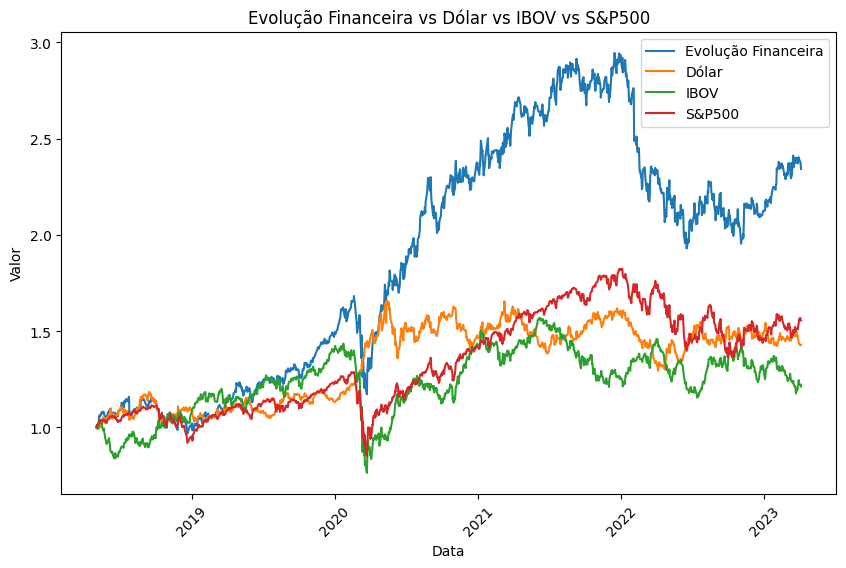

In [196]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(carteira_comparativa2.index, carteira_comparativa2['evolucao_fin'], label='Evolução Financeira')
ax.plot(carteira_comparativa2.index, carteira_comparativa2['dolar'], label='Dólar')
ax.plot(carteira_comparativa2.index, carteira_comparativa2['IBOV'], label='IBOV')
ax.plot(carteira_comparativa2.index, carteira_comparativa2['S&P500'], label='S&P500')

ax.set_title('Evolução Financeira vs Dólar vs IBOV vs S&P500')
ax.set_xlabel('Data')
ax.set_ylabel('Valor')

plt.xticks(rotation=45)

plt.legend()

In [197]:
 print(carteira_comparativa2.loc['2023-03-30'])

evolucao_fin    2.403614
dolar           1.446417
IBOV            1.245233
S&P500          1.540398
Name: 2023-03-30 00:00:00, dtype: float64


In [199]:
 valor_carteira_data_especifica = (df_carteira2['evolucao_fin'].loc['2023-03-30']).round(2)
 display(Markdown(f'<font size="{font_size}">O Volume financeiro é: {valor_carteira_data_especifica} em reais</font>'))

<font size="6">O Volume financeiro é: 63425.9 em reais</font>